## Klasifikasi Lokasi Indoor Berdasarkan Sinyal WiFi

### Kelompok 9 :
### - Yasinta Hutri Salamanang (18123001)
### - Ashley Fadiya Hayaah (18123012)
### - Naisya Sizzarra Rarasdewi (18123048)
### - Ikbar Alif Sofiyan (18123050)


### Import libraries

In [1]:
# import libraries
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
from math import sqrt
import seaborn as sns
sns.set(style="whitegrid")

from pprint import pprint

# helpers
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

# estimators
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# model metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

### Read dataset using Pandas

In [3]:
wifi = pd.read_csv('c:/Users/ASUS/downloads/trainingData.csv')
print("Shape of dataset:", wifi.shape)
wifi.head()

Shape of dataset: (19937, 529)


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [4]:
wifi.tail()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049
19936,100,100,100,100,100,100,100,100,100,100,...,100,-7536.1658,4.864898e+06,3,1,112,2,18,10,1371711025


## Evaluate data

In [5]:
wifi.info()
missing_values = wifi.isnull().sum().sum()
print("Total missing values:", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB
Total missing values: 0


In [6]:
#descriptive stats
wifi.describe().T

,count,mean,std,min,25%,50%,75%,max
WAP001,19937.0,9.982364e+01,5.866842,-9.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP002,19937.0,9.982094e+01,5.798156,-9.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP003,19937.0,1.000000e+02,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP004,19937.0,1.000000e+02,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP005,19937.0,9.961373e+01,8.615657,-9.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
...,...,...,...,...,...,...,...,...
SPACEID,19937.0,1.484300e+02,58.342106,1.000000e+00,1.100000e+02,1.290000e+02,2.070000e+02,2.540000e+02
RELATIVEPOSITION,19937.0,1.833024e+00,0.372964,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
USERID,19937.0,9.068014e+00,4.988720,1.000000e+00,5.000000e+00,1.100000e+01,1.300000e+01,1.800000e+01
PHONEID,19937.0,1.302187e+01,5.362410,1.000000e+00,8.000000e+00,1.300000e+01,1.400000e+01,2.400000e+01


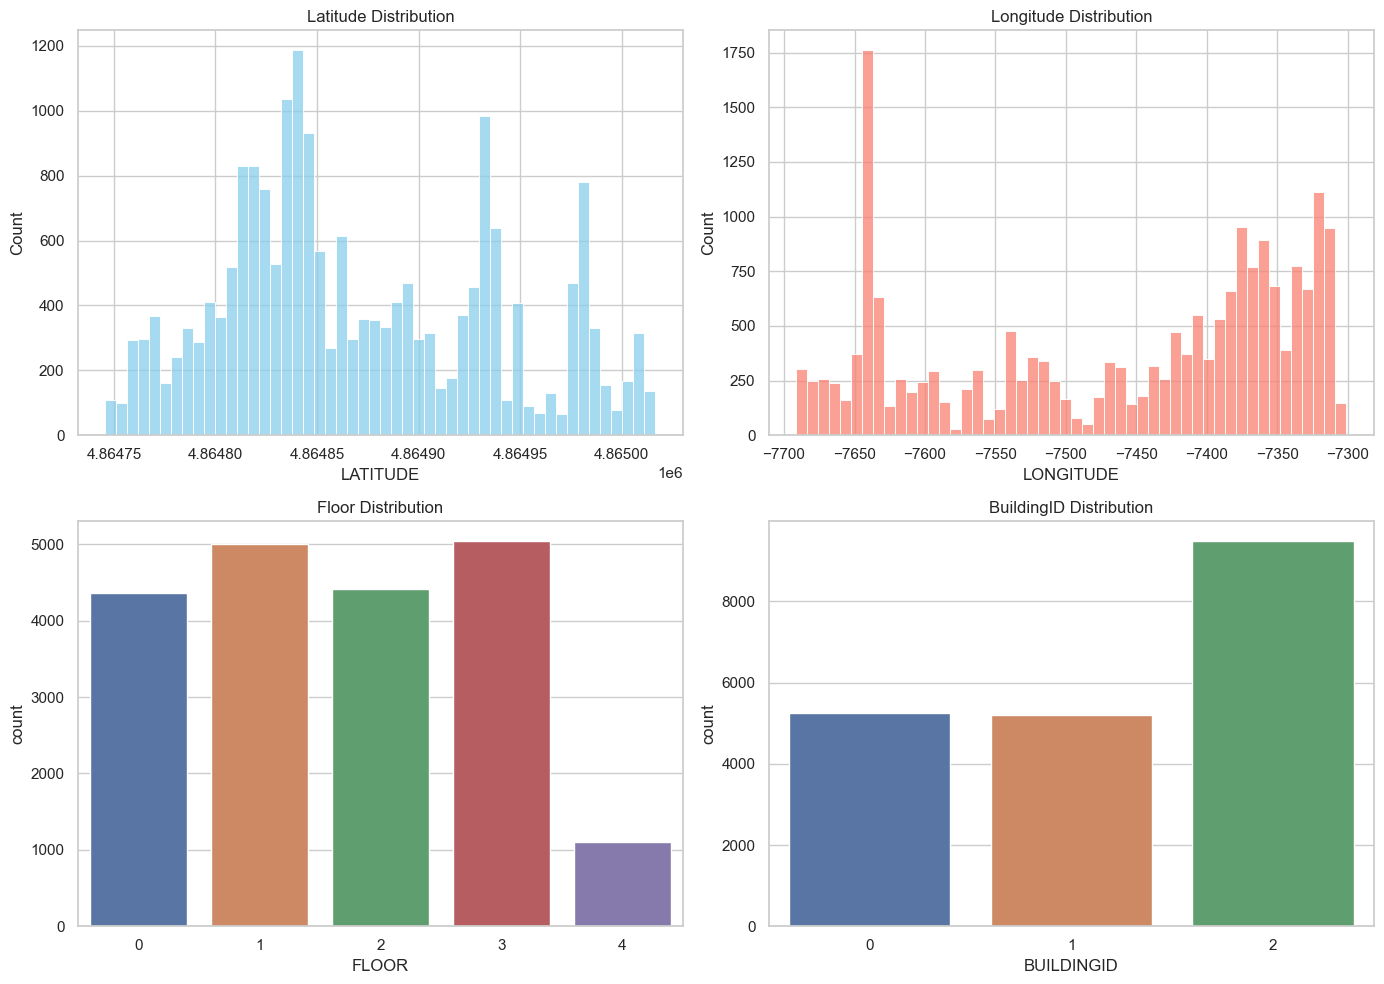

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(wifi['LATITUDE'], bins=50, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Latitude Distribution')

sns.histplot(wifi['LONGITUDE'], bins=50, ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Longitude Distribution')

sns.countplot(x='FLOOR', data=wifi, ax=axes[1, 0])
axes[1, 0].set_title('Floor Distribution')

sns.countplot(x='BUILDINGID', data=wifi, ax=axes[1, 1])
axes[1, 1].set_title('BuildingID Distribution')

plt.tight_layout()
plt.show()

### Feature Engineering

In [8]:
# Ambil semua kolom WAP
wap_columns = [col for col in wifi.columns if 'WAP' in col]

# Salin data WAP dan ganti nilai 100 menjadi -105
X = wifi[wap_columns]
X_clean = X.replace(100, -105)

# Gabungkan kembali dengan kolom non-WAP
non_wap_columns = [col for col in wifi.columns if col not in wap_columns]
wifi_clean = pd.concat([X_clean, wifi[non_wap_columns].reset_index(drop=True)], axis=1)

In [9]:
# Hapus baris yang seluruh sinyalnya -105 (tidak ada sinyal terdeteksi sama sekali)
mask_all_missing = (X_clean == -105).all(axis=1)
wifi_clean = wifi_clean[~mask_all_missing].reset_index(drop=True)
X_clean = X_clean[~mask_all_missing].reset_index(drop=True)

# Hapus baris yang memiliki lebih dari 95% sinyal -105
threshold = int(0.95 * X_clean.shape[1])
mask_mostly_missing = (X_clean == -105).sum(axis=1) > threshold

rows_before = wifi_clean.shape[0]
wifi_clean = wifi_clean[~mask_mostly_missing].reset_index(drop=True)
X_clean = X_clean[~mask_mostly_missing].reset_index(drop=True)
rows_after = wifi_clean.shape[0]

print(f"Jumlah baris sebelum: {rows_before}")
print(f"Jumlah baris sesudah: {rows_after}")
print(f"Jumlah baris dihapus (>95% sinyal -105): {rows_before - rows_after}")

Jumlah baris sebelum: 19861
Jumlah baris sesudah: 3011
Jumlah baris dihapus (>95% sinyal -105): 16850


In [10]:
# Analisis sinyal terkuat per baris (RSSI maksimum)
strongest_signal = X_clean.max(axis=1)

# Statistik deskriptif dari sinyal terkuat
print("Statistik Sinyal Terkuat per Baris:")
print(strongest_signal.describe())

# Distribusi sinyal terkuat
signal_distribution = strongest_signal.value_counts().sort_index()
print("\nDistribusi 10 nilai sinyal terkuat yang paling umum:")
print(signal_distribution.head(10))


Statistik Sinyal Terkuat per Baris:
count    3011.000000
mean      -53.166722
std        14.151674
min       -83.000000
25%       -61.000000
50%       -56.000000
75%       -46.000000
max         0.000000
dtype: float64

Distribusi 10 nilai sinyal terkuat yang paling umum:
-83     6
-82     6
-81    15
-80    21
-79    17
-78    15
-77    14
-76     8
-75     6
-74    20
Name: count, dtype: int64


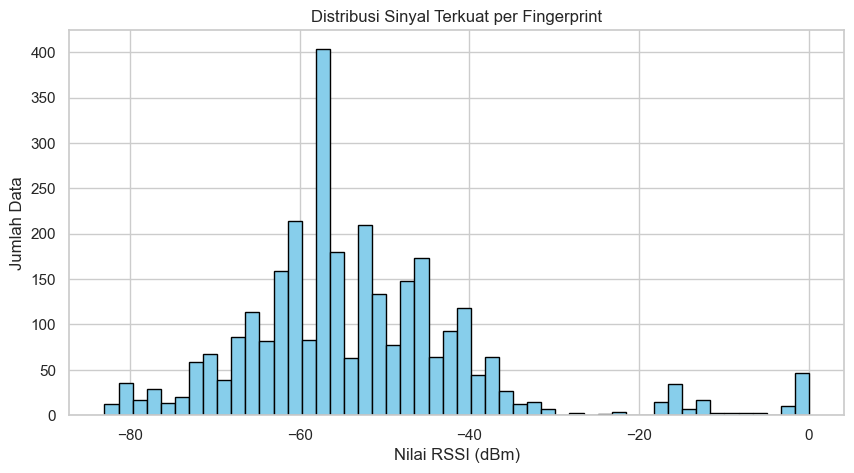

In [11]:
plt.figure(figsize=(10, 5))
plt.hist(strongest_signal, bins=50, color='skyblue', edgecolor='black')
plt.title('Distribusi Sinyal Terkuat per Fingerprint')
plt.xlabel('Nilai RSSI (dBm)')
plt.ylabel('Jumlah Data')
plt.grid(True)
plt.show()

### Preprocessing Data

In [12]:
# Preprocessing Data

# Mengganti nilai '100' (tidak terdeteksi) dengan NaN pada kolom WAP
wifi = wifi.replace(100, np.nan)

# Menangani missing values (misalnya dengan mengganti NaN dengan nilai rata-rata dari kolom WAP)
wifi.fillna(wifi.mean(), inplace=True)

# Menyaring kolom-kolom yang digunakan (sinyal WAP dan koordinat)
features = [col for col in wifi.columns if col.startswith('WAP')]  # Semua kolom yang diawali dengan 'WAP'
features += ['LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID', 'USERID', 'PHONEID']  # Tambahkan fitur lokasi dan ID pengguna

# Memilih fitur dan label
X = wifi[features]  # Fitur: WAP, Longitude, Latitude, Floor, BuildingID, SpaceID, UserID, PhoneID
y = wifi['FLOOR']   # Label: Lantai (Floor)

# Mengonversi data kategorikal menjadi numerik menggunakan LabelEncoder
label_columns = ['BUILDINGID', 'SPACEID', 'USERID', 'PHONEID']
label_encoder = LabelEncoder()

for col in label_columns:
    X[col] = label_encoder.fit_transform(X[col])

# Membagi dataset menjadi data pelatihan dan pengujian (80% pelatihan, 20% pengujian)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan beberapa informasi setelah preprocessing
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of testing data: {X_test.shape}")


Shape of training data: (15949, 527)
Shape of testing data: (3988, 527)


C:\Users\ASUS\AppData\Local\Temp\ipykernel_29416\3865514417.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29416\3865514417.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_29416\3865514417.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexe

Train shape : (15949, 527)
Test  shape : (3988, 527)


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['WAP003' 'WAP004' 'WAP092' 'WAP093' 'WAP094' 'WAP095' 'WAP152' 'WAP158'
 'WAP159' 'WAP160' 'WAP215' 'WAP217' 'WAP226' 'WAP227' 'WAP238' 'WAP239'
 'WAP240' 'WAP241' 'WAP242' 'WAP243' 'WAP244' 'WAP245' 'WAP246' 'WAP247'
 'WAP254' 'WAP293' 'WAP296' 'WAP301' 'WAP303' 'WAP304' 'WAP307' 'WAP333'
 'WAP349' 'WAP353' 'WAP360' 'WAP365' 'WAP416' 'WAP419' 'WAP423' 'WAP429'
 'WAP433' 'WAP438' 'WAP441' 'WAP442' 'WAP444' 'WAP445' 'WAP451' 'WAP458'
 'WAP482' 'WAP485' 'WAP487' 'WAP488' 'WAP491' 'WAP497' 'WAP520']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['WAP003' 'WAP004' 'WAP092' 'WAP093' 'WAP094' 'WAP095' 'WAP152' 'WAP158'
 'WAP159' 'WAP160' 'WAP215' 'WAP217' 'WAP226' 'WAP227' 'WAP238' 'W


Evaluation Metrics
Accuracy : 0.9661
Precision: 0.9663
Recall   : 0.9661
F1 Score : 0.9661

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       874
           1       0.95      0.98      0.96      1001
           2       0.96      0.94      0.95       883
           3       0.98      0.95      0.96      1010
           4       1.00      1.00      1.00       220

    accuracy                           0.97      3988
   macro avg       0.97      0.97      0.97      3988
weighted avg       0.97      0.97      0.97      3988



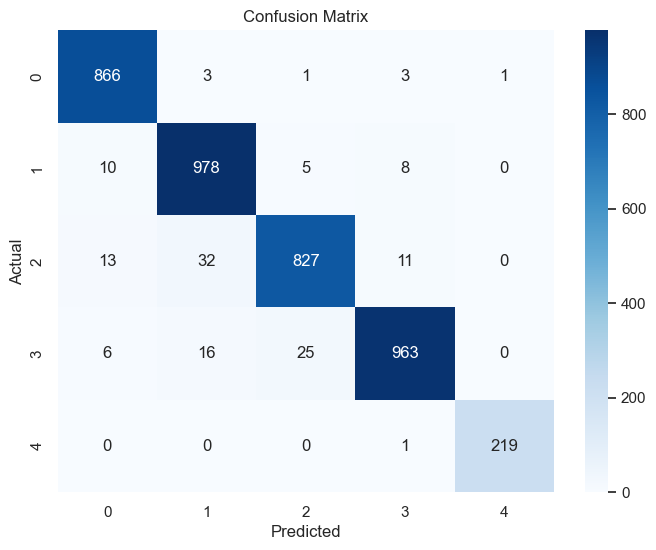

In [20]:
# =====================================================
# 0. PERSIAPAN DATAFRAME wifi --------------------------
# Pastikan variabel `wifi` masih berisi data asli
# =====================================================
# Contoh: wifi = pd.read_csv("trainingData.csv")

# =====================================================
# 1. BANGUN FITUR & LABEL -----------------------------
# =====================================================
wap_cols   = [c for c in wifi.columns if c.startswith('WAP')]
extra_cols = ['LONGITUDE', 'LATITUDE', 'FLOOR',
              'BUILDINGID', 'SPACEID', 'USERID', 'PHONEID']
feat_cols  = wap_cols + extra_cols

# ganti 100 (tidak terdeteksi) → NaN  ──> akan di-impute di pipeline
X = wifi[feat_cols].replace(100, np.nan)
y = wifi['FLOOR'].squeeze()           # label 1-D

# =====================================================
# 2. SPLIT TRAIN-TEST ---------------------------------
# =====================================================
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print("Train shape :", X_train.shape)
print("Test  shape :", X_test.shape)

# =====================================================
# 3. PIPELINE  (Imputer → Scaler → KNN) ---------------
# =====================================================
from sklearn.pipeline      import Pipeline
from sklearn.compose       import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.impute        import SimpleImputer
from sklearn.neighbors     import KNeighborsClassifier

numeric_cols    = X_train.select_dtypes(include=[np.number]).columns.tolist()
numeric_pipe    = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # <─ tangani NaN
    ('scaler',  StandardScaler())
])

preprocess = ColumnTransformer(
    transformers=[('num', numeric_pipe, numeric_cols)],
    remainder='drop'    # kolom string (jika ada) otomatis dibuang
)

knn_pipe = Pipeline([
    ('prep',  preprocess),
    ('model', KNeighborsClassifier(n_neighbors=5))
])

# =====================================================
# 4. TRAIN --------------------------------------------
# =====================================================
knn_pipe.fit(X_train, y_train)

# =====================================================
# 5. PREDIKSI & EVALUASI ------------------------------
# =====================================================
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report, confusion_matrix)
import matplotlib.pyplot as plt, seaborn as sns

y_pred = knn_pipe.predict(X_test)

print("\nEvaluation Metrics")
print(f"Accuracy : {accuracy_score (y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"Recall   : {recall_score   (y_test, y_pred, average='weighted', zero_division=0):.4f}")
print(f"F1 Score : {f1_score       (y_test, y_pred, average='weighted', zero_division=0):.4f}")

print("\nClassification Report")
print(classification_report(y_test, y_pred, zero_division=0))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


Fitting 5 folds for each of 30 candidates, totalling 150 fits


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['WAP003' 'WAP004' 'WAP092' 'WAP093' 'WAP094' 'WAP095' 'WAP152' 'WAP158'
 'WAP159' 'WAP160' 'WAP215' 'WAP217' 'WAP226' 'WAP227' 'WAP238' 'WAP239'
 'WAP240' 'WAP241' 'WAP242' 'WAP243' 'WAP244' 'WAP245' 'WAP246' 'WAP247'
 'WAP254' 'WAP293' 'WAP296' 'WAP301' 'WAP303' 'WAP304' 'WAP307' 'WAP333'
 'WAP349' 'WAP353' 'WAP360' 'WAP365' 'WAP416' 'WAP419' 'WAP423' 'WAP429'
 'WAP433' 'WAP438' 'WAP441' 'WAP442' 'WAP444' 'WAP445' 'WAP451' 'WAP458'
 'WAP482' 'WAP485' 'WAP487' 'WAP488' 'WAP491' 'WAP497' 'WAP520']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Best parameters : {'model__metric': 'manhattan', 'model__n_neighbors': 3, 'model__weights': 'distance'}
Best CV score   : 0.9898427490265813


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['WAP003' 'WAP004' 'WAP092' 'WAP093' 'WAP094' 'WAP095' 'WAP152' 'WAP158'
 'WAP159' 'WAP160' 'WAP215' 'WAP217' 'WAP226' 'WAP227' 'WAP238' 'WAP239'
 'WAP240' 'WAP241' 'WAP242' 'WAP243' 'WAP244' 'WAP245' 'WAP246' 'WAP247'
 'WAP254' 'WAP293' 'WAP296' 'WAP301' 'WAP303' 'WAP304' 'WAP307' 'WAP333'
 'WAP349' 'WAP353' 'WAP360' 'WAP365' 'WAP416' 'WAP419' 'WAP423' 'WAP429'
 'WAP433' 'WAP438' 'WAP441' 'WAP442' 'WAP444' 'WAP445' 'WAP451' 'WAP458'
 'WAP482' 'WAP485' 'WAP487' 'WAP488' 'WAP491' 'WAP497' 'WAP520']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(



Evaluation Metrics (best KNN)
Accuracy : 0.9907
Precision: 0.9908
Recall   : 0.9907
F1 Score : 0.9907

Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       874
           1       0.98      1.00      0.99      1001
           2       1.00      0.97      0.98       883
           3       0.99      1.00      1.00      1010
           4       1.00      1.00      1.00       220

    accuracy                           0.99      3988
   macro avg       0.99      0.99      0.99      3988
weighted avg       0.99      0.99      0.99      3988



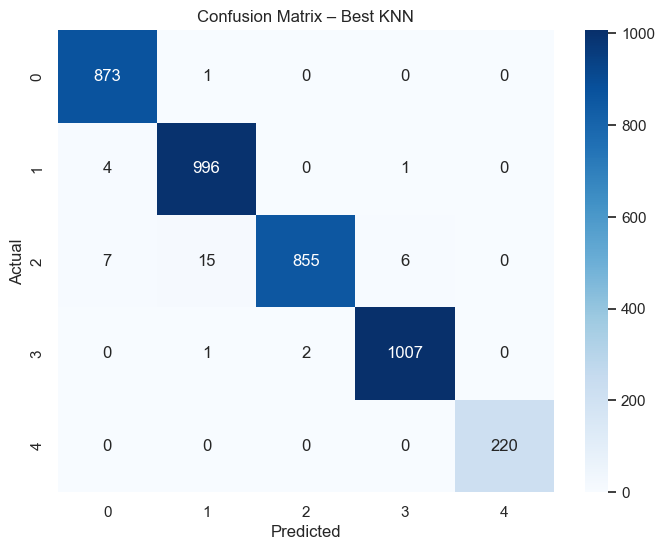

In [22]:
# =========================================================
# 1. PIPELINE (Imputer → Scaler → KNN)
# =========================================================
from sklearn.pipeline      import Pipeline
from sklearn.compose       import ColumnTransformer
from sklearn.impute        import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors     import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# --- semua kolom numerik ---
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

numeric_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),   # isi NaN
    ('scaler',  StandardScaler())
])

preprocess = ColumnTransformer(
    transformers=[('num', numeric_pipe, num_cols)],
    remainder='drop'        # kolom string (jika ada) otomatis dibuang
)

knn = KNeighborsClassifier()

pipe = Pipeline([
    ('prep',  preprocess),
    ('model', knn)
])

# =========================================================
# 2. GRID SEARCH di dalam pipeline
#    ─ awali dengan  'model__' karena step-name = 'model'
# =========================================================
param_grid = {
    'model__n_neighbors': [3, 5, 7, 9, 11],
    'model__weights'    : ['uniform', 'distance'],
    'model__metric'     : ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(
    estimator = pipe,
    param_grid = param_grid,
    cv = 5,
    n_jobs = -1,
    verbose = 1,
    scoring = 'accuracy'
)

# =========================================================
# 3. FIT  (NaN ditangani di dalam pipeline, jadi aman)
# =========================================================
grid_search.fit(X_train, y_train.squeeze())

print("Best parameters :", grid_search.best_params_)
print("Best CV score   :", grid_search.best_score_)

# =========================================================
# 4. EVALUASI MODEL TERBAIK
# =========================================================
best_knn = grid_search.best_estimator_          # pipeline lengkap
y_pred   = best_knn.predict(X_test)

from sklearn.metrics import (accuracy_score, precision_score,
                             recall_score, f1_score,
                             classification_report, confusion_matrix)
import matplotlib.pyplot as plt, seaborn as sns
import numpy as np

acc  = accuracy_score (y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
rec  = recall_score   (y_test, y_pred, average='weighted', zero_division=0)
f1   = f1_score       (y_test, y_pred, average='weighted', zero_division=0)

print("\nEvaluation Metrics (best KNN)")
print(f"Accuracy : {acc :.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec :.4f}")
print(f"F1 Score : {f1 :.4f}")

print("\nClassification Report")
print(classification_report(y_test, y_pred, zero_division=0))

conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_mat,
            annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix – Best KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['WAP003' 'WAP004' 'WAP092' 'WAP093' 'WAP094' 'WAP095' 'WAP152' 'WAP158'
 'WAP159' 'WAP160' 'WAP215' 'WAP217' 'WAP226' 'WAP227' 'WAP238' 'WAP239'
 'WAP240' 'WAP241' 'WAP242' 'WAP243' 'WAP244' 'WAP245' 'WAP246' 'WAP247'
 'WAP254' 'WAP293' 'WAP296' 'WAP301' 'WAP303' 'WAP304' 'WAP307' 'WAP333'
 'WAP349' 'WAP353' 'WAP360' 'WAP365' 'WAP416' 'WAP419' 'WAP423' 'WAP429'
 'WAP433' 'WAP438' 'WAP441' 'WAP442' 'WAP444' 'WAP445' 'WAP451' 'WAP458'
 'WAP482' 'WAP485' 'WAP487' 'WAP488' 'WAP491' 'WAP497' 'WAP520']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['WAP003' 'WAP004' 'WAP092' 'WAP093' 'WAP094' 'WAP095' 'WAP152' 'WAP158'
 'WAP159' 'WAP160' 'WAP215' 'WAP217' 'WAP226' 'WAP227' 'WAP238' 'W


Evaluation Metrics for Random Forest:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00      1001
           2       1.00      1.00      1.00       883
           3       1.00      1.00      1.00      1010
           4       1.00      1.00      1.00       220

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988



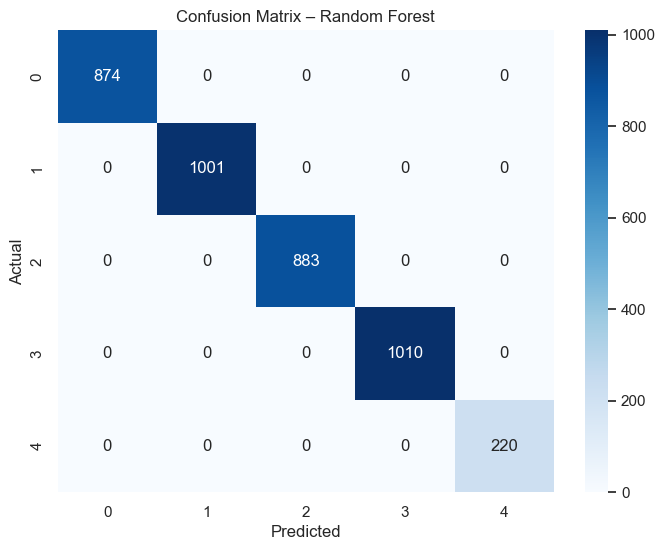

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Tentukan kolom numerik
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Pipeline untuk data numerik: isi NaN + scaling
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Gabung dalam ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_pipeline, num_cols)],
    remainder='drop'  # buang kolom non-numerik jika ada
)

# Pipeline model Random Forest
rf_pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

# Latih model
rf_pipeline.fit(X_train, y_train.squeeze())

# Prediksi
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluasi
accuracy_rf  = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted', zero_division=0)
recall_rf    = recall_score(y_test, y_pred_rf, average='weighted', zero_division=0)
f1_rf        = f1_score(y_test, y_pred_rf, average='weighted', zero_division=0)

# Tampilkan hasil
print("\nEvaluation Metrics for Random Forest:")
print(f"Accuracy : {accuracy_rf:.4f}")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall   : {recall_rf:.4f}")
print(f"F1 Score : {f1_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# Confusion Matrix
conf_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['WAP003' 'WAP004' 'WAP092' 'WAP093' 'WAP094' 'WAP095' 'WAP152' 'WAP158'
 'WAP159' 'WAP160' 'WAP215' 'WAP217' 'WAP226' 'WAP227' 'WAP238' 'WAP239'
 'WAP240' 'WAP241' 'WAP242' 'WAP243' 'WAP244' 'WAP245' 'WAP246' 'WAP247'
 'WAP254' 'WAP293' 'WAP296' 'WAP301' 'WAP303' 'WAP304' 'WAP307' 'WAP333'
 'WAP349' 'WAP353' 'WAP360' 'WAP365' 'WAP416' 'WAP419' 'WAP423' 'WAP429'
 'WAP433' 'WAP438' 'WAP441' 'WAP442' 'WAP444' 'WAP445' 'WAP451' 'WAP458'
 'WAP482' 'WAP485' 'WAP487' 'WAP488' 'WAP491' 'WAP497' 'WAP520']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\impute\_base.py:555: UserWarning: Skipping features without any observed values: ['WAP003' 'WAP004' 'WAP092' 'WAP093' 'WAP094' 'WAP095' 'WAP152' 'WAP158'
 'WAP159' 'WAP160' 'WAP215' 'WAP217' 'WAP226' 'WAP227' 'WAP238' 'W


Evaluation Metrics for Gradient Boosting:
Accuracy : 1.0000
Precision: 1.0000
Recall   : 1.0000
F1 Score : 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       874
           1       1.00      1.00      1.00      1001
           2       1.00      1.00      1.00       883
           3       1.00      1.00      1.00      1010
           4       1.00      1.00      1.00       220

    accuracy                           1.00      3988
   macro avg       1.00      1.00      1.00      3988
weighted avg       1.00      1.00      1.00      3988



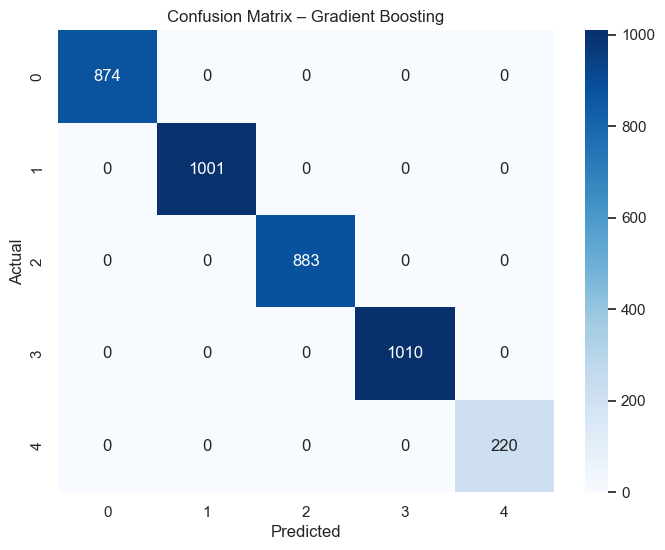

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Kolom numerik
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Pipeline preprocessing
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[('num', numeric_pipeline, num_cols)],
    remainder='drop'  # drop kolom non-numerik (jika ada)
)

# Pipeline model Gradient Boosting
gb_pipeline = Pipeline([
    ('prep', preprocessor),
    ('model', GradientBoostingClassifier(random_state=42))
])

# Training
gb_pipeline.fit(X_train, y_train.squeeze())

# Prediksi
y_pred_gb = gb_pipeline.predict(X_test)

# Evaluasi
accuracy_gb  = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb, average='weighted', zero_division=0)
recall_gb    = recall_score(y_test, y_pred_gb, average='weighted', zero_division=0)
f1_gb        = f1_score(y_test, y_pred_gb, average='weighted', zero_division=0)

# Cetak hasil
print("\nEvaluation Metrics for Gradient Boosting:")
print(f"Accuracy : {accuracy_gb:.4f}")
print(f"Precision: {precision_gb:.4f}")
print(f"Recall   : {recall_gb:.4f}")
print(f"F1 Score : {f1_gb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb, zero_division=0))

# Confusion matrix
conf_gb = confusion_matrix(y_test, y_pred_gb)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_gb, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_test),
            yticklabels=np.unique(y_test))
plt.title("Confusion Matrix – Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [26]:
# Membandingkan hasil evaluasi antara model-model yang telah dilatih

# Membuat DataFrame untuk menyimpan hasil perbandingan
model_comparison = pd.DataFrame({
    'Model': ['KNN', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_best_knn, accuracy_rf, accuracy_gb],
    'Precision': [precision_best_knn, precision_rf, precision_gb],
    'Recall': [recall_best_knn, recall_rf, recall_gb],
    'F1 Score': [f1_best_knn, f1_rf, f1_gb]
})

# Menampilkan hasil perbandingan
print(model_comparison)


NameError: name 'accuracy_best_knn' is not defined

In [ ]:
# GridSearchCV untuk Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],  # Jumlah pohon keputusan
    'max_depth': [10, 20, 30],       # Kedalaman maksimal pohon
    'min_samples_split': [2, 5, 10]  # Jumlah minimum sampel untuk pemisahan
}

grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                              param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search_rf.fit(X_train, y_train)

# Menampilkan parameter terbaik untuk Random Forest
print(f"Best Parameters for Random Forest: {grid_search_rf.best_params_}")
print(f"Best Score for Random Forest: {grid_search_rf.best_score_}")

# Menggunakan model terbaik dari GridSearchCV
best_rf = grid_search_rf.best_estimator_

# Melakukan prediksi menggunakan model terbaik
y_pred_best_rf = best_rf.predict(X_test)

# Evaluasi model terbaik Random Forest
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
precision_best_rf = precision_score(y_test, y_pred_best_rf, average='weighted')
recall_best_rf = recall_score(y_test, y_pred_best_rf, average='weighted')
f1_best_rf = f1_score(y_test, y_pred_best_rf, average='weighted')

print("\nEvaluation Metrics for Best Random Forest Model:")
print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision: {precision_best_rf:.4f}")
print(f"Recall: {recall_best_rf:.4f}")
print(f"F1 Score: {f1_best_rf:.4f}")


In [ ]:
# GridSearchCV untuk Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],  # Jumlah estimator
    'learning_rate': [0.01, 0.05, 0.1],  # Tingkat pembelajaran
    'max_depth': [3, 5, 7]  # Kedalaman pohon
}

grid_search_gb = GridSearchCV(estimator=GradientBoostingClassifier(random_state=42), 
                              param_grid=param_grid_gb, cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

grid_search_gb.fit(X_train, y_train)

# Menampilkan parameter terbaik untuk Gradient Boosting
print(f"Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}")
print(f"Best Score for Gradient Boosting: {grid_search_gb.best_score_}")

# Menggunakan model terbaik dari GridSearchCV
best_gb = grid_search_gb.best_estimator_

# Melakukan prediksi menggunakan model terbaik
y_pred_best_gb = best_gb.predict(X_test)

# Evaluasi model terbaik Gradient Boosting
accuracy_best_gb = accuracy_score(y_test, y_pred_best_gb)
precision_best_gb = precision_score(y_test, y_pred_best_gb, average='weighted')
recall_best_gb = recall_score(y_test, y_pred_best_gb, average='weighted')
f1_best_gb = f1_score(y_test, y_pred_best_gb, average='weighted')

print("\nEvaluation Metrics for Best Gradient Boosting Model:")
print(f"Accuracy: {accuracy_best_gb:.4f}")
print(f"Precision: {precision_best_gb:.4f}")
print(f"Recall: {recall_best_gb:.4f}")
print(f"F1 Score: {f1_best_gb:.4f}")


In [ ]:
# Prediksi lokasi berdasarkan model terbaik
# Misalnya kita memilih model terbaik dari hasil GridSearchCV (Random Forest)
y_pred_location = best_rf.predict(X_test)

# Menampilkan hasil prediksi lokasi
predicted_location = pd.DataFrame({'True Floor': y_test, 'Predicted Floor': y_pred_location})
print(predicted_location.head())

# Visualisasi lokasi yang diprediksi terhadap lokasi yang sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_location, color='blue', alpha=0.5, label="Predicted vs True")
plt.xlabel("True Floor")
plt.ylabel("Predicted Floor")
plt.title("True vs Predicted Location")
plt.legend()
plt.show()


In [ ]:
# Menyaring area dengan sinyal lemah (misalnya nilai RSSI di bawah -90)
weak_signal_areas = X[X[features].mean(axis=1) < -90]  # Menyaring sinyal lemah berdasarkan rata-rata sinyal per baris
print(weak_signal_areas[['LONGITUDE', 'LATITUDE', 'FLOOR']])  # Menampilkan koordinat dan lantai area dengan sinyal lemah


In [ ]:
# Visualisasi prediksi lokasi dibandingkan dengan lokasi yang sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_location, color='blue', alpha=0.5, label="Predicted vs True")
plt.xlabel("True Floor")
plt.ylabel("Predicted Floor")
plt.title("True vs Predicted Location")
plt.legend()
plt.show()

# Menghitung selisih antara prediksi dan nilai sebenarnya
location_difference = abs(y_test - y_pred_location)
print(f"Average Difference in Predicted Location: {location_difference.mean():.4f}")

In [ ]:
# Menyaring area dengan sinyal lemah berdasarkan nilai rata-rata RSSI (di bawah -90)
weak_signal_threshold = -90
weak_signal_areas = X[X[features].mean(axis=1) < weak_signal_threshold]

# Menampilkan data area dengan sinyal lemah, misalnya longitude, latitude, dan lantai
weak_signal_summary = weak_signal_areas[['LONGITUDE', 'LATITUDE', 'FLOOR']].drop_duplicates()
print(weak_signal_summary)

# Visualisasi area dengan sinyal lemah
plt.figure(figsize=(10, 6))
plt.scatter(weak_signal_summary['LONGITUDE'], weak_signal_summary['LATITUDE'], color='red', label='Weak Signal Areas')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Weak Signal Areas in the Building")
plt.legend()
plt.show()

In [ ]:
# Menyaring area sinyal lemah dengan lebih dari 3 titik dalam satu area
recommendations = weak_signal_summary.groupby(['LONGITUDE', 'LATITUDE']).filter(lambda x: len(x) > 3)

# Rekomendasi untuk area dengan banyak titik lemah
print("\nRecommendations for AP Optimization:")
print(f"Consider adding or repositioning APs in the following areas: {recommendations[['LONGITUDE', 'LATITUDE']].drop_duplicates()}")


In [ ]:
# Menggabungkan hasil analisis lokasi dan area sinyal lemah
final_recommendations = pd.merge(weak_signal_summary, predicted_location, left_on='FLOOR', right_on='Predicted Floor')

# Menampilkan hasil rekomendasi yang telah dipetakan
print("\nFinal Optimization Recommendations:")
print(final_recommendations[['LONGITUDE', 'LATITUDE', 'FLOOR']])

### Analisis Dampak Pengoptimalan:

###  1. Simulasi peningkatan kualitas sinyal dengan penambahan Access Point (AP).

###  2. Evaluasi dampak dari perubahan dalam distribusi sinyal di gedung.

In [ ]:
# Misalkan kita memindahkan AP ke area yang teridentifikasi dan meningkatkan sinyal
# Kita dapat mensimulasikan perubahan ini dengan menambahkan nilai rata-rata RSSI untuk area sinyal lemah
X_simulated = X.copy()

# Misalnya, untuk area dengan sinyal lemah, kita meningkatkan RSSI secara simulatif
weak_signal_indices = X_simulated.index.isin(weak_signal_areas.index)
X_simulated.loc[weak_signal_indices, features] += 10  # Meningkatkan RSSI sebesar 10

# Hitung rata-rata sinyal setelah simulasi
avg_signal_before = X[features].mean().mean()
avg_signal_after = X_simulated[features].mean().mean()

# Menampilkan dampak pengoptimalan
print(f"Average Signal Strength Before Optimization: {avg_signal_before:.2f}")
print(f"Average Signal Strength After Optimization: {avg_signal_after:.2f}")
print(f"Difference in Signal Strength: {avg_signal_after - avg_signal_before:.2f}")


In [ ]:
# Misalkan kita menambahkan beberapa AP baru di area yang teridentifikasi sebagai sinyal lemah
# Menambahkan data Access Point yang baru di sekitar area dengan sinyal lemah
new_ap_positions = weak_signal_summary[['LONGITUDE', 'LATITUDE']].head(3)  # Menambahkan 3 AP baru di area terlemah

print("\nNew Access Point Positions for Optimization:")
print(new_ap_positions)

# Misalnya kita memperbaiki distribusi sinyal dengan mengalihkan sinyal yang lebih kuat ke area lemah
# Kita bisa mensimulasikan pengalihan sinyal atau penambahan penguat sinyal di sekitar area tersebut
X_simulated['WAP001'] += 15  # Meningkatkan sinyal WAP001 untuk mensimulasikan penambahan AP

# Visualisasi pengaruh penambahan AP pada sinyal
plt.figure(figsize=(10, 6))
plt.scatter(X_simulated['LONGITUDE'], X_simulated['LATITUDE'], c=X_simulated['WAP001'], cmap='coolwarm', label="Simulated Signal Strength")
plt.colorbar(label="Signal Strength (RSSI)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Simulated Signal Strength with New APs Added")
plt.legend()
plt.show()


In [ ]:
# Rencana implementasi untuk pengoptimalan jaringan
optimization_plan = {
    'New AP Positions': new_ap_positions,
    'Recommendations': "Add 3 new APs in weak signal areas to improve signal strength. Re-assess signal quality after implementation."
}

print("\nOptimization Plan:")
print(optimization_plan)